In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [2]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

In [5]:
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_scaled)
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)


In [15]:
best_dbscan_silhouette = -1
best_eps = 0
best_min_samples = 0

for eps in [0.3, 0.5, 0.7, 0.9]:
    for min_samples in [3, 5, 7]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X_scaled)

        # Handling DBSCAN noise points (-1 labels)
        if len(set(dbscan_labels)) > 1:
            dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
            if dbscan_silhouette > best_dbscan_silhouette:
                best_dbscan_silhouette = dbscan_silhouette
                best_eps = eps
                best_min_samples = min_samples
                best_dbscan_labels = dbscan_labels


In [16]:
results = {
    'K-Means': kmeans_silhouette,
    'Hierarchical': hierarchical_silhouette,
    'DBSCAN': dbscan_silhouette
}

In [17]:
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Silhouette Score'])
print(results_df)

              Silhouette Score
K-Means               0.479881
Hierarchical          0.446689
DBSCAN                0.522457


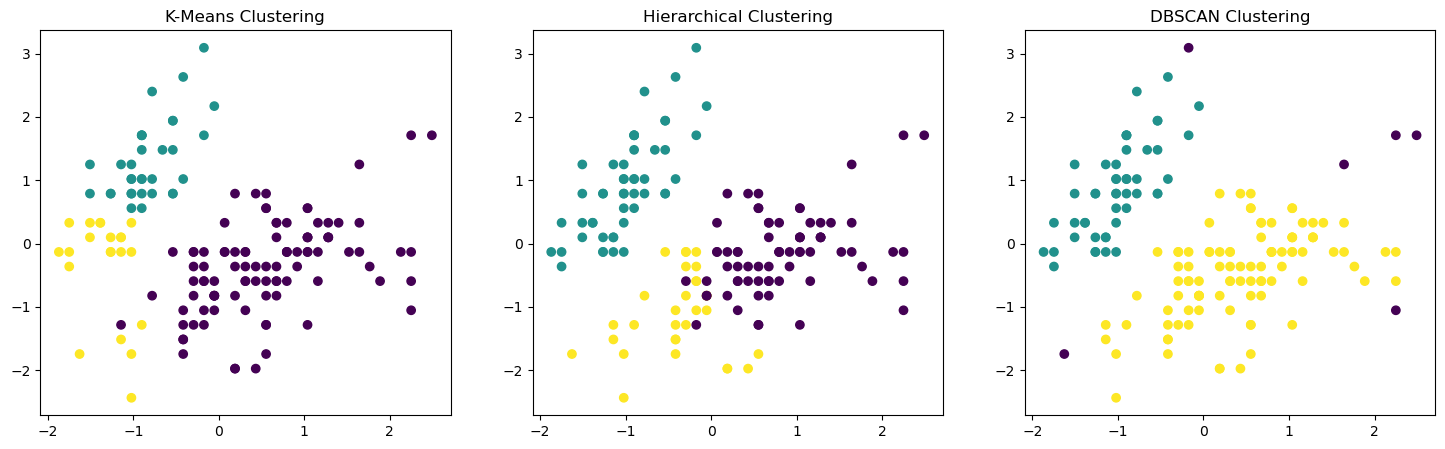

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
axes[0].set_title('K-Means Clustering')

axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=hierarchical_labels, cmap='viridis')
axes[1].set_title('Hierarchical Clustering')

axes[2].scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
axes[2].set_title('DBSCAN Clustering')

plt.show()
